In [1]:
import numpy as np
import keras
import keras.datasets.mnist
import time

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,) 

print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [2]:
# Convert y_train into one-hot format
# !!! Run only once
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [3]:
print("Sizes...")
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

Sizes...
((60000, 28, 28), (60000, 10))
((10000, 28, 28), (10000, 10))


In [4]:
n=1000
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(n, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [5]:
start = time.time()
model4.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
end = time.time()

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.4693 - acc: 0.9150 - val_loss: 0.2082 - val_acc: 0.9476
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2031 - acc: 0.9496 - val_loss: 0.2205 - val_acc: 0.9519
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1878 - acc: 0.9535 - val_loss: 0.1862 - val_acc: 0.9551
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1682 - acc: 0.9582 - val_loss: 0.1675 - val_acc: 0.9569
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1428 - acc: 0.9639 - val_loss: 0.1587 - val_acc: 0.9603
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1282 - acc: 0.9691 - val_loss: 0.1734 - val_acc: 0.9623
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1162 - acc: 0.9719 - val_loss: 0.1361 - val_acc: 0.9701
Epoch 8/10
1875/1875 [==============================] -

In [49]:
#model4.summary()

In [66]:
print("-------------------------------------------------")
print("Benchmark Results for this test")
print()
print("Elapsed Time (min):",(end - start)/60.0)
print(end-start, "seconds")
print("-------------------------------------------------")


-------------------------------------------------
Benchmark Results for this test

Elapsed Time (min): 3.3826238473256427
202.95743083953857 seconds
-------------------------------------------------


## Predictions

In [51]:
#len(x_train)

60000

In [67]:
t = 50000
train_sample = x_train[:t]
test_sample = y_train[:t]

start = time.time()
preds = model4.predict(train_sample)
end = time.time()

print(np.around(preds,1))
print(test_sample)
print('Time to classify ', t, ' images : ', end-start)
print('Average time to classify 1 image : ', round((end-start)/t, 4 ))

#np.array_equal(np.around(preds,1),test_sample)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Time to classify  50000  images :  2.503750801086426
Average time to classify 1 image :  0.0001


In [10]:
import sys
print(model4)
sys.getsizeof(model4)

48

In [11]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('CPU')
print(len(physical_devices))

1


## Pickle and plot

In [41]:
import pandas as pd
dfres = pd.read_pickle('../saved_results/pickledf.pkl')
dfres


,Execution time,Prediction time,By image
Neurons,,,
5,5.19,0.10,0.0
10,5.73,0.08,0.0


In [42]:
import pandas as pd
dfres2 = pd.read_pickle('../saved_results/picklemac')
dfres2


,Execution time,Prediction time,By image
Neurons,,,
5,5.11,0.10,0.0
10,6.74,0.08,0.0


In [27]:

dflist = dfres.values.tolist()
dflist

[[5.19, 0.1, 0.0], [5.73, 0.08, 0.0]]

In [36]:
times = []
for i in dfres.values.tolist():
    times.append(i[0])
times

[5.19, 5.73]

In [38]:
idxlist = dfres.index.tolist()
neurons = []
for i in idxlist:
    neurons.append(int(i))
neurons

[5, 10]

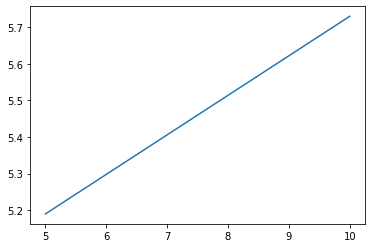

In [40]:
import matplotlib.pyplot as plt 

plt.plot(neurons,times)
